In [2]:
import pandas as pd
df = pd.read_csv('C:\Program Files\Scripts\CSVFiles\Reviews.csv')
print(df.head())

   Id   ProductId          UserId                      ProfileName   
0   1  B001E4KFG0  A3SGXH7AUHU8GW                       delmartian  \
1   2  B00813GRG4  A1D87F6ZCVE5NK                           dll pa   
2   3  B000LQOCH0   ABXLMWJIXXAIN  Natalia Corres "Natalia Corres"   
3   4  B000UA0QIQ  A395BORC6FGVXV                             Karl   
4   5  B006K2ZZ7K  A1UQRSCLF8GW1T    Michael D. Bigham "M. Wassir"   

   HelpfulnessNumerator  HelpfulnessDenominator  Score        Time   
0                     1                       1      5  1303862400  \
1                     0                       0      1  1346976000   
2                     1                       1      4  1219017600   
3                     3                       3      2  1307923200   
4                     0                       0      5  1350777600   

                 Summary                                               Text  
0  Good Quality Dog Food  I have bought several of the Vitality canned d...  
1 

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 568454 entries, 0 to 568453
Data columns (total 10 columns):
 #   Column                  Non-Null Count   Dtype 
---  ------                  --------------   ----- 
 0   Id                      568454 non-null  int64 
 1   ProductId               568454 non-null  object
 2   UserId                  568454 non-null  object
 3   ProfileName             568428 non-null  object
 4   HelpfulnessNumerator    568454 non-null  int64 
 5   HelpfulnessDenominator  568454 non-null  int64 
 6   Score                   568454 non-null  int64 
 7   Time                    568454 non-null  int64 
 8   Summary                 568427 non-null  object
 9   Text                    568454 non-null  object
dtypes: int64(5), object(5)
memory usage: 43.4+ MB


In [10]:
df.count()

Id                        568454
ProductId                 568454
UserId                    568454
ProfileName               568428
HelpfulnessNumerator      568454
HelpfulnessDenominator    568454
Score                     568454
Time                      568454
Summary                   568427
Text                      568454
dtype: int64

In [11]:
df.ProductId.nunique(dropna = True)

74258

In [7]:
df.ProfileName.nunique(dropna = True)

218415

In [9]:
df['Score'].isna().sum()

0

In [14]:
df['Score'] = df['Score'].fillna(0)

In [15]:
df['Score'].isna().sum()

0

In [17]:
df.shape

(568454, 10)

In [18]:
i = df[(df.Score == 'Like')].index
print(i)

Index([], dtype='int64')


In [19]:
df.shape

(568454, 10)

In [20]:
rating = df.Score.tolist()
print(len(rating))

568454


In [22]:
for i in range (0,len(rating)):
    rating[i] = float(rating[i])

In [23]:
import numpy as np
print(np.unique(rating))

[1. 2. 3. 4. 5.]


In [24]:
df['rating'] = rating
df.shape

(568454, 11)

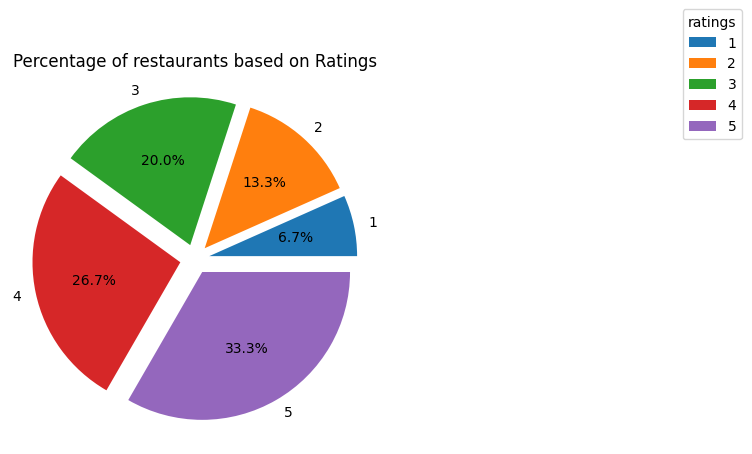

In [25]:
import matplotlib.pyplot as plt
y = np.unique(rating)
mylabels = [1,2,3,4,5]
plt.pie(y,labels = mylabels,autopct = '%1.1f%%', explode=(0.1,0.1,0.1,0.1,0.1))
plt.legend(title='ratings',bbox_to_anchor=(2,1),loc = 'right')
plt.title('Percentage of restaurants based on Ratings')
plt.show()

In [26]:
df['Text'].count()

568454

In [28]:
pd.cut(df['rating'], bins=3).value_counts(sort=False)

rating
(0.996, 2.333]     82037
(2.333, 3.667]     42640
(3.667, 5.0]      443777
Name: count, dtype: int64

In [29]:
labels = ['below the average','average','great']
df['rating_group'] = pd.cut(df['rating'],bins = 3,labels = labels)
print(df.head(3))

   Id   ProductId          UserId                      ProfileName   
0   1  B001E4KFG0  A3SGXH7AUHU8GW                       delmartian  \
1   2  B00813GRG4  A1D87F6ZCVE5NK                           dll pa   
2   3  B000LQOCH0   ABXLMWJIXXAIN  Natalia Corres "Natalia Corres"   

   HelpfulnessNumerator  HelpfulnessDenominator  Score        Time   
0                     1                       1      5  1303862400  \
1                     0                       0      1  1346976000   
2                     1                       1      4  1219017600   

                 Summary                                               Text   
0  Good Quality Dog Food  I have bought several of the Vitality canned d...  \
1      Not as Advertised  Product arrived labeled as Jumbo Salted Peanut...   
2  "Delight" says it all  This is a confection that has been around a fe...   

   rating       rating_group  
0     5.0              great  
1     1.0  below the average  
2     4.0              great

In [31]:
df1 = df.drop(['Score','rating'],axis = 1)